In [8]:
from pyfft.cuda import Plan
import numpy
import pycuda.driver as cuda
from pycuda.tools import make_default_context
import pycuda.gpuarray as gpuarray

cuda.init()
context = make_default_context()
stream = cuda.Stream()

plan = Plan((16, 16), stream=stream)

data = numpy.ones((16, 16), dtype=numpy.complex64)
gpu_data = gpuarray.to_gpu(data)
print gpu_data

plan.execute(gpu_data)
result = gpu_data.get()
print result 

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.

In [9]:
import numpy
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
a_gpu = gpuarray.to_gpu(numpy.random.randn(4,4).astype(numpy.float32))
a_doubled = (2*a_gpu).get()
print a_gpu
print a_doubled

[[ 0.29267076 -0.71475238 -1.49612045 -2.260602  ]
 [ 0.9153347   0.44918704 -1.00948286  0.22929674]
 [-0.10485576 -2.33868861 -0.20714986  1.10161781]
 [ 0.2677052  -1.63013887 -0.8332327   0.98165643]]
[[ 0.58534151 -1.42950475 -2.99224091 -4.52120399]
 [ 1.8306694   0.89837408 -2.01896572  0.45859349]
 [-0.20971152 -4.67737722 -0.41429973  2.20323563]
 [ 0.5354104  -3.26027775 -1.6664654   1.96331286]]


In [10]:
"""
Demonstrates how to use the PyCUDA interface to CUFFT to compute 1D FFTs.
"""

import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import numpy as np

import skcuda.fft as cu_fft

print 'Testing fft/ifft..'
N = 8192*1024

x = np.asarray(np.random.rand(N), np.float32)
xf = np.fft.fft(x)
y = np.real(np.fft.ifft(xf))

x_gpu = gpuarray.to_gpu(x)
xf_gpu = gpuarray.empty(N/2+1, np.complex64)
plan_forward = cu_fft.Plan(x_gpu.shape, np.float32, np.complex64)
cu_fft.fft(x_gpu, xf_gpu, plan_forward)

y_gpu = gpuarray.empty_like(x_gpu)
plan_inverse = cu_fft.Plan(x_gpu.shape, np.complex64, np.float32)
cu_fft.ifft(xf_gpu, y_gpu, plan_inverse, True)

print 'Success status: ', np.allclose(y, y_gpu.get(), atol=1e-6)

print 'Testing in-place fft..'
x = np.asarray(np.random.rand(N)+1j*np.random.rand(N), np.complex64)
x_gpu = gpuarray.to_gpu(x)

plan = cu_fft.Plan(x_gpu.shape, np.complex64, np.complex64)
cu_fft.fft(x_gpu, x_gpu, plan)

cu_fft.ifft(x_gpu, x_gpu, plan, True)

print 'Success status: ', np.allclose(x, x_gpu.get(), atol=1e-6)

/usr/local/lib/python2.7/dist-packages/skcuda/cublas.py:272: UserWarning: creating CUBLAS context to get version number
  warnings.warn('creating CUBLAS context to get version number')


Testing fft/ifft..
Success status:  True
Testing in-place fft..
Success status:  True


In [3]:
%%writefile vispytest.py
#! /usr/bin/env python
# -*- coding: utf-8 -*-
# vispy: gallery 20
# -----------------------------------------------------------------------------
# Copyright (c) 2014, Nicolas P. Rougier, Guillaume Bâty. All Rights Reserved.
# Distributed under the (new) BSD License.
# -----------------------------------------------------------------------------
# High frequency (below pixel resolution) function plot
#
#  -> http://blog.hvidtfeldts.net/index.php/2011/07/plotting-high-frequency-fun
#     ctions-using-a-gpu/
#  -> https://www.shadertoy.com/view/4sB3zz
# -----------------------------------------------------------------------------
from vispy import gloo, app, keys


VERT_SHADER = """
attribute vec2 a_position;
void main (void)
{
    gl_Position = vec4(a_position, 0.0, 1.0);
}
"""

FRAG_SHADER = """
uniform vec2 u_resolution;
uniform float u_global_time;
// --- Your function here ---
float function( float x )
{
    float d = 3.0 - 2.0*(1.0+cos(u_global_time/5.0))/2.0;
    return sin(pow(x,d))*sin(x);
}
// --- Your function here ---
float sample(vec2 uv)
{
    const int samples = 128;
    const float fsamples = float(samples);
    vec2 maxdist = vec2(0.5,1.0)/40.0;
    vec2 halfmaxdist = vec2(0.5) * maxdist;
    float stepsize = maxdist.x / fsamples;
    float initial_offset_x = -0.5 * fsamples * stepsize;
    uv.x += initial_offset_x;
    float hit = 0.0;
    for( int i=0; i<samples; ++i )
    {
        float x = uv.x + stepsize * float(i);
        float y = uv.y;
        float fx = function(x);
        float dist = abs(y-fx);
        hit += step(dist, halfmaxdist.y);
    }
    const float arbitraryFactor = 4.5;
    const float arbitraryExp = 0.95;
    return arbitraryFactor * pow( hit / fsamples, arbitraryExp );
}
void main(void)
{
    vec2 uv = gl_FragCoord.xy / u_resolution.xy;
    float ymin = -2.0;
    float ymax = +2.0;
    float xmin = 0.0;
    float xmax = xmin + (ymax-ymin)* u_resolution.x / u_resolution.y;
    vec2 xy = vec2(xmin,ymin) + uv*vec2(xmax-xmin, ymax-ymin);
    gl_FragColor = vec4(0.0,0.0,0.0, sample(xy));
}
"""


class Canvas(app.Canvas):
    def __init__(self, pause=False):
        app.Canvas.__init__(self, size=(800, 600), keys='interactive')
        self.program = gloo.Program(VERT_SHADER, FRAG_SHADER)
        self.program["u_global_time"] = 0
        self.program['a_position'] = [(-1, -1), (-1, +1),
                                      (+1, -1), (+1, +1)]

        self.apply_zoom()

        gloo.set_state(blend=True,
                       blend_func=('src_alpha', 'one_minus_src_alpha'))

        self._timer = app.Timer('auto', connect=self.on_timer_event,
                                start=True)

        self.show()

    def on_resize(self, event):
        self.apply_zoom()

    def on_draw(self, event):
        gloo.clear('white')
        self.program.draw(mode='triangle_strip')

    def on_timer_event(self, event):
        if self._timer.running:
            self.program["u_global_time"] += event.dt
        self.update()

    def on_key_press(self, event):
        if event.key is keys.SPACE:
            if self._timer.running:
                self._timer.stop()
            else:
                self._timer.start()

    def apply_zoom(self):
        self.program["u_resolution"] = self.physical_size
        gloo.set_viewport(0, 0, *self.physical_size)


if __name__ == '__main__':
    c = Canvas()
app.run()

Overwriting vispytest.py


In [11]:
%%writefile vispytest2.py
# -*- coding: utf-8 -*-
# Copyright (c) 2015, Vispy Development Team.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# vispy: gallery 1
"""
A spectrogram and waveform plot of 1D data.
"""

import numpy as np

from vispy import plot as vp

# Create a logarithmic chirp
fs = 1000.
N = 10000
t = np.arange(N) / float(fs)
f0, f1 = 1., 500.
phase = (t[-1] / np.log(f1 / f0)) * f0 * (pow(f1 / f0, t / t[-1]) - 1.0)
data = np.cos(2 * np.pi * phase)

fig = vp.Fig(size=(800, 400), show=False)
fig[0:2, 0].spectrogram(data, fs=fs, clim=(-100, -20))
fig[2, 0].plot(np.array((t, data)).T, marker_size=0)

if __name__ == '__main__':
    fig.show(run=True)

Overwriting vispytest2.py


In [22]:
%%writefile vispytest2.py

# -*- coding: utf-8 -*-
# Copyright (c) 2015, Vispy Development Team.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
"""
Plot data with different styles
"""

import numpy as np

from vispy.plot import Fig
fig = Fig()
ax_left = fig[0, 0]
ax_right = fig[0, 1]

import numpy as np
data = np.random.randn(2, 10)
ax_left.plot(data)
ax_right.histogram(data[1])

Overwriting vispytest2.py


In [7]:
%%writefile galaxy.py

#!/usr/bin/env python
import numpy as np
import sys

from vispy.util.transforms import perspective
from vispy.util import transforms
from vispy import gloo
from vispy import app
from vispy import io

import galaxy_specrend
from galaxy_simulation import Galaxy

VERT_SHADER = """
#version 120
uniform mat4  u_model;
uniform mat4  u_view;
uniform mat4  u_projection;
//sampler that maps [0, n] -> color according to blackbody law
uniform sampler1D u_colormap;
//index to sample the colormap at
attribute float a_color_index;
//size of the star
attribute float a_size;
//type
//type 0 - stars
//type 1 - dust
//type 2 - h2a objects
//type 3 - h2a objects
attribute float a_type;
attribute vec2  a_position;
//brightness of the star
attribute float a_brightness;
varying vec3 v_color;
void main (void)
{
    gl_Position = u_projection * u_view * u_model * vec4(a_position, 0.0,1.0);
    //find base color according to physics from our sampler
    vec3 base_color = texture1D(u_colormap, a_color_index).rgb;
    //scale it down according to brightness
    v_color = base_color * a_brightness;
    if (a_size > 2.0)
    {
        gl_PointSize = a_size;
    } else {
        gl_PointSize = 0.0;
    }
    if (a_type == 2) {
        v_color *= vec3(2, 1, 1);
    }
    else if (a_type == 3) {
        v_color = vec3(.9);
    }
}
"""

FRAG_SHADER = """
#version 120
//star texture
uniform sampler2D u_texture;
//predicted color from black body
varying vec3 v_color;
void main()
{
    //amount of intensity from the grayscale star
    float star_tex_intensity = texture2D(u_texture, gl_PointCoord).r;
    gl_FragColor = vec4(v_color * star_tex_intensity, 0.8);
}
"""

galaxy = Galaxy(10000)
galaxy.reset(13000, 4000, 0.0004, 0.90, 0.90, 0.5, 200, 300)
# coldest and hottest temperatures of out galaxy
t0, t1 = 200.0, 10000.0
# total number of discrete colors between t0 and t1
n = 1000
dt = (t1 - t0) / n

# maps [0, n) -> colors
# generate a linear interpolation of temperatures
# then map the temperatures to colors using black body
# color predictions
colors = np.zeros(n, dtype=(np.float32, 3))
for i in range(n):
    temperature = t0 + i * dt
    x, y, z = galaxy_specrend.spectrum_to_xyz(galaxy_specrend.bb_spectrum,
                                              temperature)
    r, g, b = galaxy_specrend.xyz_to_rgb(galaxy_specrend.SMPTEsystem, x, y, z)
    r = min((max(r, 0), 1))
    g = min((max(g, 0), 1))
    b = min((max(b, 0), 1))
    colors[i] = galaxy_specrend.norm_rgb(r, g, b)


# load the PNG that we use to blend the star with
# to provide a circular look to each star.
def load_galaxy_star_image():
    fname = io.load_data_file('galaxy/star-particle.png')
    raw_image = io.read_png(fname)

    return raw_image


class Canvas(app.Canvas):

    def __init__(self):
        # setup initial width, height
        app.Canvas.__init__(self, keys='interactive', size=(800, 600))

        # create a new shader program
        self.program = gloo.Program(VERT_SHADER, FRAG_SHADER,
                                    count=len(galaxy))

        # load the star texture
        self.texture = gloo.Texture2D(load_galaxy_star_image(),
                                      interpolation='linear')
        self.program['u_texture'] = self.texture

        # construct the model, view and projection matrices
        self.view = transforms.translate((0, 0, -5))
        self.program['u_view'] = self.view

        self.model = np.eye(4, dtype=np.float32)
        self.program['u_model'] = self.model

        self.program['u_colormap'] = colors

        w, h = self.size
        self.projection = perspective(45.0, w / float(h), 1.0, 1000.0)
        self.program['u_projection'] = self.projection

        # start the galaxy to some decent point in the future
        galaxy.update(100000)
        data = self.__create_galaxy_vertex_data()

        # setup the VBO once the galaxy vertex data has been setup
        # bind the VBO for the first time
        self.data_vbo = gloo.VertexBuffer(data)
        self.program.bind(self.data_vbo)

        # setup blending
        gloo.set_state(clear_color=(0.0, 0.0, 0.03, 1.0),
                       depth_test=False, blend=True,
                       blend_func=('src_alpha', 'one'))

        self._timer = app.Timer('auto', connect=self.update, start=True)

    def __create_galaxy_vertex_data(self):
        data = np.zeros(len(galaxy),
                        dtype=[('a_size', np.float32, 1),
                               ('a_position', np.float32, 2),
                               ('a_color_index', np.float32, 1),
                               ('a_brightness', np.float32, 1),
                               ('a_type', np.float32, 1)])

        # see shader for parameter explanations
        pw, ph = self.physical_size
        data['a_size'] = galaxy['size'] * max(pw / 800.0, ph / 800.0)
        data['a_position'] = galaxy['position'] / 13000.0

        data['a_color_index'] = (galaxy['temperature'] - t0) / (t1 - t0)
        data['a_brightness'] = galaxy['brightness']
        data['a_type'] = galaxy['type']

        return data

    def on_resize(self, event):
        # setup the new viewport
        gloo.set_viewport(0, 0, *event.physical_size)
        # recompute the projection matrix
        w, h = event.size
        self.projection = perspective(45.0, w / float(h),
                                      1.0, 1000.0)
        self.program['u_projection'] = self.projection

    def on_draw(self, event):
        # update the galaxy
        galaxy.update(50000)  # in years !

        # recreate the numpy array that will be sent as the VBO data
        data = self.__create_galaxy_vertex_data()
        # update the VBO
        self.data_vbo.set_data(data)
        # bind the VBO to the GL context
        self.program.bind(self.data_vbo)

        # clear the screen and render
        gloo.clear(color=True, depth=True)
        self.program.draw('points')


if __name__ == '__main__':
    c = Canvas()
    c.show()

    if sys.flags.interactive == 0:
app.run()

Writing galaxy.py


In [24]:
%%writefile compare.py
import numpy as np
import glumpy
from glumpy import figure, Trackball
from OpenGL import GLUT as glut
from time import time
from matplotlib.pyplot import subplots,close
from matplotlib import cm

def randomwalk(dims=(256,256),n=3,sigma=10,alpha=0.95,seed=1):
    """ A simple random walk with memory """
    M = np.zeros(dims,dtype=np.float32)
    r,c = dims
    gen = np.random.RandomState(seed)
    pos = gen.rand(2,n)*((r,),(c,))
    old_delta = gen.randn(2,n)*sigma
    while 1:
        delta = (1.-alpha)*gen.randn(2,n)*sigma + alpha*old_delta
        pos += delta
        for ri,ci in pos.T:
            if not (0. <= ri < r) : ri = abs(ri % r)
            if not (0. <= ci < c) : ci = abs(ci % c)
            M[ri,ci] += 1
        old_delta = delta
        yield M

def mplrun(niter=1000):
    """ Visualise the simulation using matplotlib, using blit for 
    improved speed"""
    fig,ax = subplots(1,1)
    rw = randomwalk()
    im = ax.imshow(rw.next(),interpolation='nearest',cmap=cm.hot,animated=True)
    fig.canvas.draw()
    background = fig.canvas.copy_from_bbox(ax.bbox) # cache the background

    tic = time()
    for ii in xrange(niter):
        im.set_data(rw.next())          # update the image data
        fig.canvas.restore_region(background)   # restore background
        ax.draw_artist(im)          # redraw the image
        fig.canvas.blit(ax.bbox)        # redraw the axes rectangle

    close(fig)
    print "Matplotlib average FPS: %.2f" %(niter/(time()-tic))

def gprun(niter=1000):
    """ Visualise the same simulation using Glumpy """
    rw = randomwalk()
    M = rw.next()

    # create a glumpy figure
    fig = glumpy.figure((512,512))

    # the Image.data attribute is a referenced copy of M - when M
    # changes, the image data also gets updated
    im = glumpy.image.Image(M,colormap=glumpy.colormap.Hot)

    @fig.event
    def on_draw():
        """ called in the simulation loop, and also when the
        figure is resized """
        fig.clear()
        im.update()
        im.draw( x=0, y=0, z=0, width=fig.width, height=fig.height )

    tic = time()
    for ii in xrange(niter):
        M = rw.next()           # update the array          
        glut.glutMainLoopEvent()    # dispatch queued window events
        on_draw()           # update the image in the back buffer
        glut.glutSwapBuffers()      # swap the buffers so image is displayed

    fig.window.hide()
    print "Glumpy average FPS: %.2f" %(niter/(time()-tic))

if __name__ == "__main__":
    mplrun()
    gprun()

Overwriting compare.py


In [25]:
%%writefile compare.py

import pyqtgraph as pg
import numpy as np
app = pg.mkQApp()

y = np.random.normal(size=(120,20000), scale=0.2) + np.arange(120)[:,np.newaxis]
x = np.empty((120,20000))
x[:] = np.arange(20000)[np.newaxis,:]
view = pg.GraphicsLayoutWidget()
view.show()
w1 = view.addPlot()

class MultiLine(pg.QtGui.QGraphicsPathItem):
    def __init__(self, x, y):
        """x and y are 2D arrays of shape (Nplots, Nsamples)"""
        connect = np.ones(x.shape, dtype=bool)
        connect[:,-1] = 0 # don't draw the segment between each trace
        self.path = pg.arrayToQPath(x.flatten(), y.flatten(), connect.flatten())
        pg.QtGui.QGraphicsPathItem.__init__(self, self.path)
        self.setPen(pg.mkPen('w'))
    def shape(self): # override because QGraphicsPathItem.shape is too expensive.
        return pg.QtGui.QGraphicsItem.shape(self)
    def boundingRect(self):
        return self.path.boundingRect()

now = pg.ptime.time()
lines = MultiLine(x, y)
w1.addItem(lines)
print "Plot time: %0.2f sec" % (pg.ptime.time()-now)

app.exec_()

Overwriting compare.py


In [45]:
%%writefile fftprocess.py

#!/usr/bin/python
# -*- coding: utf-8 -*-
"""
Update a simple plot as rapidly as possible to measure speed.
"""
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import numpy as np

import skcuda.fft as cu_fft

from pyqtgraph.Qt import QtGui, QtCore
import numpy as np
import pyqtgraph as pg
from pyqtgraph.ptime import time
app = QtGui.QApplication([])

p = pg.plot()
p.setWindowTitle('pyqtgraph example: PlotSpeedTest')
p.setRange(QtCore.QRectF(0, -10, 5000, 20)) 
p.setLabel('bottom', 'Index', units='B')
curve = p.plot()


N = 8192*1024
x = np.asarray(np.random.rand(N), np.float32)
x_gpu = gpuarray.to_gpu(x)
xf_gpu = gpuarray.empty(N/2+1, np.complex64)
plan_forward = cu_fft.Plan(x_gpu.shape, np.float32, np.complex64)
cu_fft.fft(x_gpu, xf_gpu, plan_forward)
a = np.abs((xf_gpu**2).get())
data=a.astype(float)

#data=np.array((a.astype(int)).tolist(),dtype=int)

ptr = 0
lastTime = time()
fps = None
def update():
    global curve, ptr, p, lastTime, fps


#     curve.setData(data[ptr%10])
    curve.setData(data)
    ptr += 1
    
    now = time()
    dt = now - lastTime
    lastTime = now
    if fps is None:
        fps = 1.0/dt
    else:
        s = np.clip(dt*3., 0, 1)
        fps = fps * (1-s) + (1.0/dt) * s
    p.setTitle('%0.2f fps' % fps)
    
    app.processEvents()  ## force complete redraw for every plot
    
    
timer = QtCore.QTimer()
timer.timeout.connect(update)
timer.start(0)


## Start Qt event loop unless running in interactive mode.
if __name__ == '__main__':
    import sys
    if (sys.flags.interactive != 1) or not hasattr(QtCore, 'PYQT_VERSION'):
        QtGui.QApplication.instance().exec_()

Overwriting fftprocess.py


In [114]:
%%writefile spectrum.py
import numpy as np
import pyqtgraph as pg
# import pyaudio
from PyQt4 import QtCore, QtGui

import sys

import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import numpy as np

import skcuda.fft as cu_fft

FS = 100e3 #Hz 100kHz

CHUNKSZ = 1024 #samples


class recorder():
    def __init__(self, signal):
        self.signal = signal

    def read(self):
        N = CHUNKSZ
        ix = np.arange(N)
        A = 100
        f0 = 100000 #1kHz
        pure = A * np.sin(2 * np.pi * f0 * ix/float(N))
        noise = np.random.normal(0, 1, N)
        signal = pure + noise

        
        self.signal.emit(signal)

class SpectrogramWidget(pg.PlotWidget):
    read_collected = QtCore.pyqtSignal(np.ndarray)
    def __init__(self):
        super(SpectrogramWidget, self).__init__()

        self.img = pg.ImageItem()
        self.addItem(self.img)

        self.img_array = np.zeros((1000, CHUNKSZ/2+1))

        # bipolar colormap

        pos = np.array([0., 1., 0.5, 0.25, 0.75])
        color = np.array([[0,255,255,255], [255,255,0,255], [0,0,0,255], (0, 0, 255, 255), (255, 0, 0, 255)], dtype=np.ubyte)
        cmap = pg.ColorMap(pos, color)
        lut = cmap.getLookupTable(0.0, 1.0, 256)

        self.img.setLookupTable(lut)
        self.img.setLevels([-50,40])

        freq = np.arange((CHUNKSZ/2)+1)/(float(CHUNKSZ)/FS)
        print freq[0],'-',freq[-1]
        sys.exit()
        yscale = 1.0/(self.img_array.shape[1]/freq[-1])
        self.img.scale((1./FS)*CHUNKSZ, yscale)

        self.setLabel('left', 'Frequency', units='kHz')

        self.win = np.hanning(CHUNKSZ)
        self.show()

    def update(self, chunk):
        
        # normalized, windowed frequencies in data chunk
        
        data = chunk*self.win
        
        spec = np.fft.rfft(data.astype(np.float32))
        
#         x_gpu = gpuarray.to_gpu(data.astype(np.float32))
#         xf_gpu = gpuarray.empty(CHUNKSZ/2+1, np.complex64)
#         plan_forward = cu_fft.Plan(x_gpu.shape, np.float32, np.complex64)
#         cu_fft.fft(x_gpu, xf_gpu, plan_forward)
        
#         spec=xf_gpu.get()
        
        # get magnitude
        psd = abs(spec/CHUNKSZ)
        
        # convert to dB scale
        psd = 20 * np.log10(psd)
        
        print len(psd)

        # roll down one and replace leading edge with new data

        self.img_array = np.roll(self.img_array, -1, 0)
        self.img_array[-1:] = psd

        self.img.setImage(self.img_array, autoLevels=False)

if __name__ == '__main__':
    app = QtGui.QApplication([])
    w = SpectrogramWidget()
    w.read_collected.connect(w.update)

    IN = recorder(w.read_collected)

    # time (seconds) between reads

    interval = FS/CHUNKSZ
    t = QtCore.QTimer()
    t.timeout.connect(IN.read)
    t.start(1000/interval) #QTimer takes ms


    app.exec_()
#     mic.close()

Overwriting spectrum.py


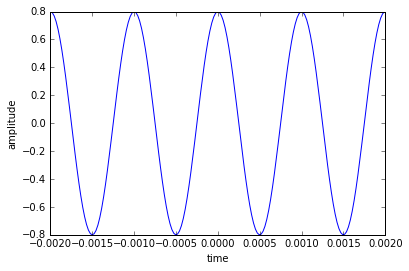

In [111]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fs = 44100
t = np.arange(-0.002, .002, 1.0/fs)
f0 = 1000
phi = np.pi/2
A = .8
x = A * np.sin(2 * np.pi * f0 * t + phi)

plt.plot(t, x)
plt.axis([-0.002, .002, -.8, .8])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()